# Regularized logistic regression
(based on Andrew Ng machine learning course)
***

In [792]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Display plots inline

In [793]:
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 16, 10

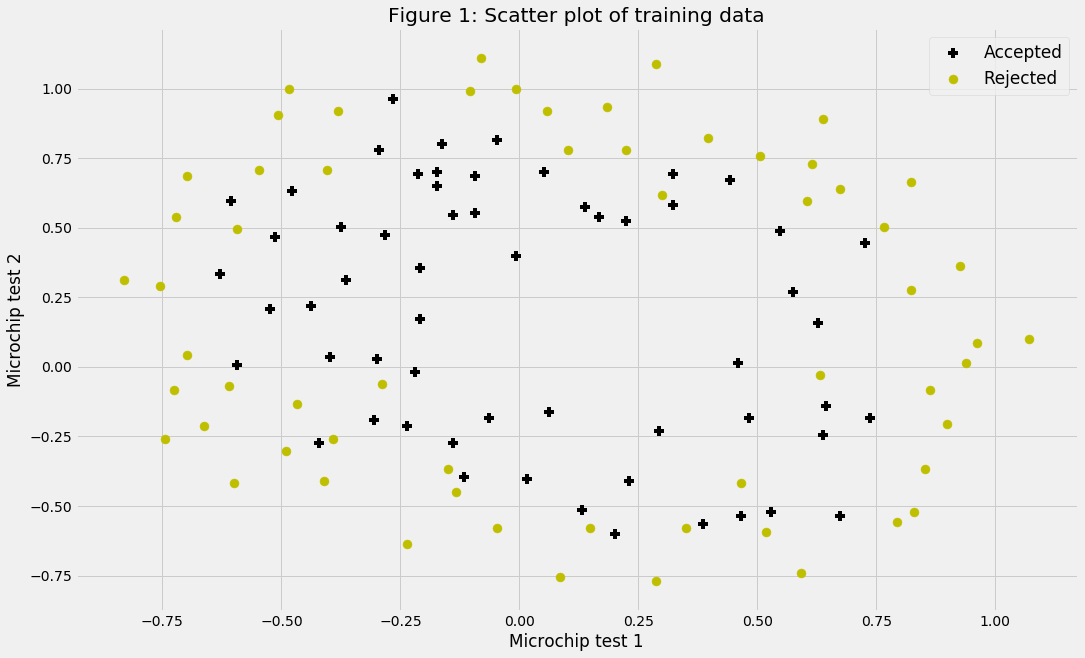

In [794]:
data = pd.read_csv('ex2data2.txt', header = None)

# X = np.array([np.ones(data.shape[0]), data['microchip_test_1'], data['microchip_test_2']]).T
y = np.array([data[2]]).T
theta = np.zeros((y.shape[1], 1))

ind_true = np.where(y == 1)
ind_false = np.where(y == 0)

plt.scatter(data[0][ind_true[0]], data[1][ind_true[0]], s = 120, c = 'k', marker = '+', label = 'Accepted')
plt.scatter(data[0][ind_false[0]], data[1][ind_false[0]], s = 80, c = 'y', marker = 'o', label = 'Rejected')
plt.legend(loc = 'upper right', prop = {'size': 17})
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.show()

## Feature maping

In [795]:
def map_feature(x1, x2, degree) :
    X = np.ones((x1.shape[0], 1))
    
    for i in range (1, degree + 1):
        for j in range (0, i + 1):
            X = np.concatenate((X, (x1 ** (i - j)) * (x2 ** j)), axis = 1)
    return X

## Cost function

In [796]:
def sigmoid(X, theta) :
    return 1 / (1 + np.exp(-np.dot(X, theta)))

def cost_func(theta, X, y, Lambda) :
    return (1 / X.shape[0]) * (np.dot(-y.T, np.log(sigmoid(X, theta))) - np.dot(1 - y.T, np.log(1 - sigmoid(X, theta)))) + Lambda / (2 * X.shape[0]) * np.sum(theta[1:] ** 2)

## Gradient descent

In [797]:
def gradient_descent(X, y, theta, alpha, iterations, gamma) :
    J_history = np.zeros((iterations, 1))
    m = X.shape[0]
    for i in range(iterations):
        J_der = sigmoid(X, theta) - y 
        theta = theta - (alpha / m) * (np.dot(J_der.T, X).T + gamma * np.concatenate((np.zeros((1,1)), np.ones((X.shape[1] - 1, 1))), axis = 0) * theta)
        J_history[i] = cost_func(theta, X, y, gamma)
    return theta, J_history 

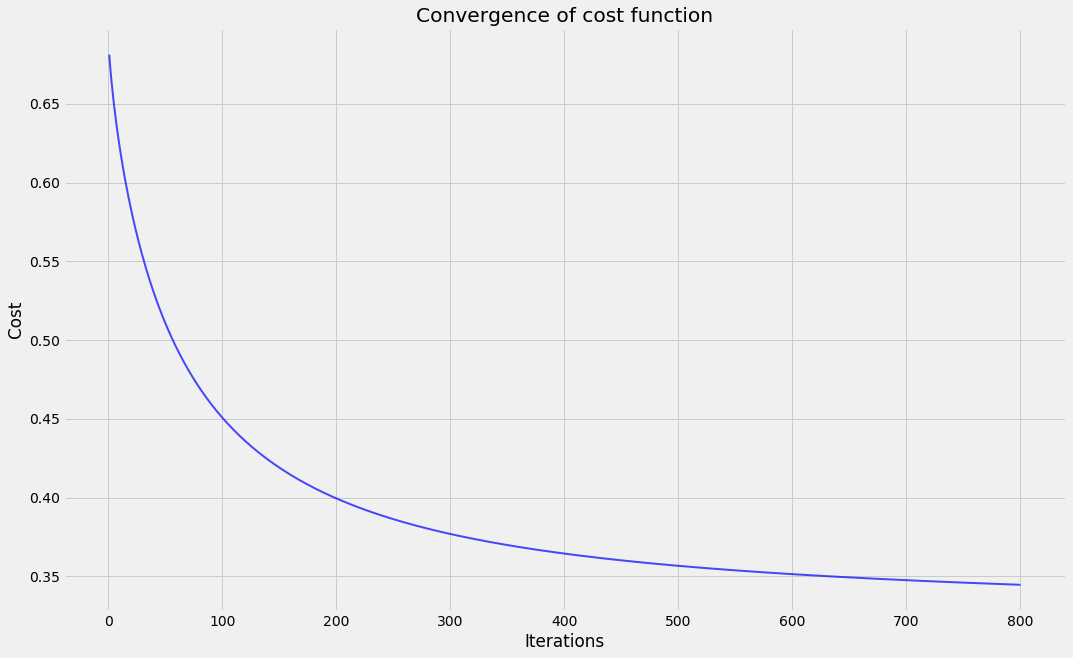

In [798]:
alpha = 1
iterations = 800
gamma = 0
degree = 6
theta = np.zeros((X.shape[1], 1))
X = map_feature(np.array([data[0]]).T, np.array([data[1]]).T, degree)

[theta, J_history] = gradient_descent(X, y, theta, alpha, iterations, gamma)

plt.plot(np.linspace(1, iterations, iterations), J_history, 'b', alpha = 0.7, label = 'function',  linewidth = 2)
# plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of cost function')
plt.show()

## Ploting of decision boundary

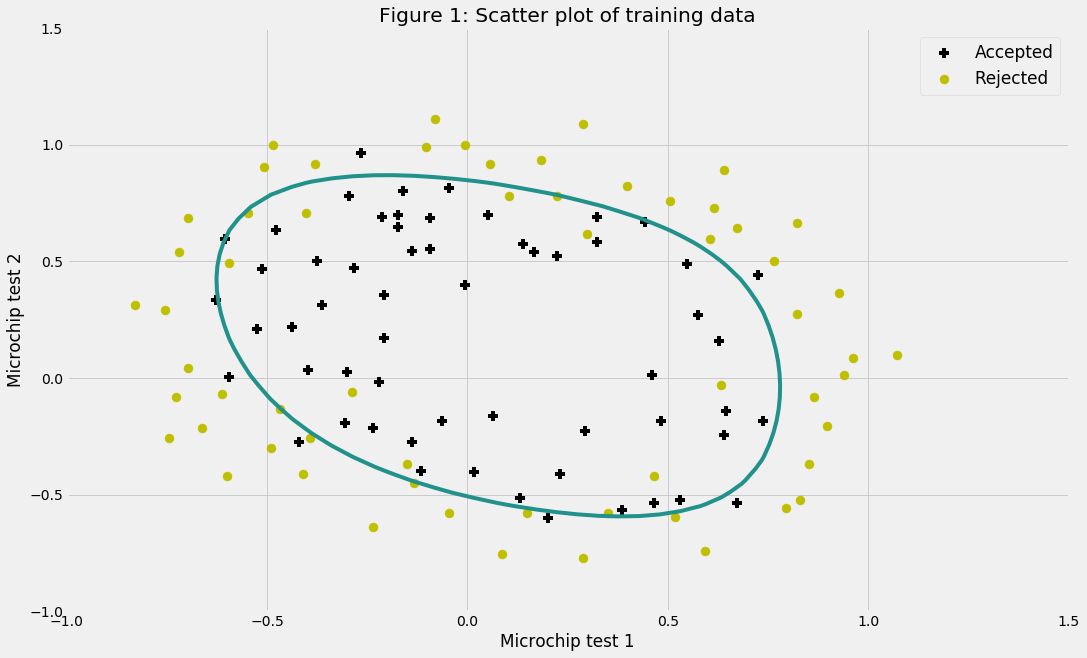

In [799]:
u_vals = np.linspace(-1, 1.5, 50)  #if I add reshape(50,1) it doesn't work
v_vals = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = np.dot(map_feature(u_vals[i].reshape(1, 1), v_vals[j].reshape(1, 1), 6), theta)
        
plt.scatter(data[0][ind_true[0]], data[1][ind_true[0]], s = 120, c = 'k', marker = '+', label = 'Accepted')
plt.scatter(data[0][ind_false[0]], data[1][ind_false[0]], s = 80, c = 'y', marker = 'o', label = 'Rejected')
plt.contour(u_vals, v_vals, z.T, 0)

plt.legend(loc = 'upper right', prop = {'size': 17})
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.show()

## Train acuracy

In [806]:
b = np.zeros((X.shape[0])) 
b = ((sigmoid(X, theta) >= 0.5).astype(int) == y).astype(int)
np.mean(b) * 100

83.89830508474576